Some libraries should be imported before you can begin.


In [2]:
import pandas as pd
import numpy as np

In [3]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

The next step is to download the data file from the repository using the **[read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)**. Let's download data about pesticide sales: https://ec.europa.eu/eurostat/databrowser/view/AEI_FM_SALPEST09__custom_1145078/default/table?lang=enhttps://ec.europa.eu/eurostat/databrowser/view/AEI_FM_SALPEST09__custom_1145078/default/table?lang=en


In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-agriculture-prognostication-using-by-neural-network/aei_fm_salpest09__custom_1145078_20210714_093842.sdmx.csv')
df

,DATAFLOW,LAST UPDATE,freq,pesticid,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:AEI_FM_SALPEST09(1.0),11/05/21 23:00:00,A,F,KG,AT,2011,1544218.0,NaN
1,ESTAT:AEI_FM_SALPEST09(1.0),11/05/21 23:00:00,A,F,KG,AT,2012,1634371.0,NaN
2,ESTAT:AEI_FM_SALPEST09(1.0),11/05/21 23:00:00,A,F,KG,AT,2013,1492799.0,NaN
3,ESTAT:AEI_FM_SALPEST09(1.0),11/05/21 23:00:00,A,F,KG,AT,2014,1641055.0,NaN
4,ESTAT:AEI_FM_SALPEST09(1.0),11/05/21 23:00:00,A,F,KG,AT,2015,2130973.0,NaN
...,...,...,...,...,...,...,...,...,...
1640,ESTAT:AEI_FM_SALPEST09(1.0),11/05/21 23:00:00,A,ZR,KG,UK,2015,NaN,cd
1641,ESTAT:AEI_FM_SALPEST09(1.0),11/05/21 23:00:00,A,ZR,KG,UK,2016,NaN,c
1642,ESTAT:AEI_FM_SALPEST09(1.0),11/05/21 23:00:00,A,ZR,KG,UK,2017,270493.0,NaN
1643,ESTAT:AEI_FM_SALPEST09(1.0),11/05/21 23:00:00,A,ZR,KG,UK,2018,NaN,c


As you can see, the DataSet consists of 1645 rows and 9 columns. Let's study the columns.


In [5]:
col = df.columns
col

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'pesticid', 'unit', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')

In this lab, we will try to build a sales forecast of one pesticide type.
As you can see from the table, we don't need to use all the columns to make this forecast because some columns contain similar data. For forecasting we need to know only the data from columns: 'pesticid', 'geo', 'TIME_PERIOD', 'OBS_VALUE'.

Let's select the necessary columns.


In [6]:
col = ['pesticid', 'geo', 'TIME_PERIOD', 'OBS_VALUE']
df = df[col]
df

,pesticid,geo,TIME_PERIOD,OBS_VALUE
0,F,AT,2011,1544218.0
1,F,AT,2012,1634371.0
2,F,AT,2013,1492799.0
3,F,AT,2014,1641055.0
4,F,AT,2015,2130973.0
...,...,...,...,...
1640,ZR,UK,2015,NaN
1641,ZR,UK,2016,NaN
1642,ZR,UK,2017,270493.0
1643,ZR,UK,2018,NaN


<details><summary>Click <b>here</b> for the solution</summary> <code>
col = ['pesticid', 'geo', 'TIME_PERIOD', 'OBS_VALUE']
df = df[col]
df
</code></details>


Let's study this DataSet. As you can see, the DataSet consist of 1645 rows × 4 columns. The columns contain the following data:

pesticid - pesticide code;

geo - country code;

TIME_PERIOD - year;

OBS_VALUE - volume of sales in KG.  

We should make sure that Python recognized the types of data correctly. To do this, we should use **[pandas.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01&highlight=info#pandas.DataFrame.info)**.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pesticid     1645 non-null   object 
 1   geo          1645 non-null   object 
 2   TIME_PERIOD  1645 non-null   int64  
 3   OBS_VALUE    1527 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 51.5+ KB


As you can see, two last columns were recognized correctly (int64 and float64). First 2 columns were recognized as objects. Let's investigate them:


### Сhanging the data and data types of columns


As you can see, the columns 'pesticid' and 'geo' have many repetitions and should be assigned to categorical fields **([pandas.astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01&highlight=astype#pandas.DataFrame.astype))**.
To see the results, we can use **[pandas.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01&highlight=describe#pandas.DataFrame.describe)**.


In [8]:
col = ['pesticid', 'geo',]
df.loc[:, col] = df[col].astype('category')
df[col].describe()

,pesticid,geo
count,1645,1645
unique,6,32
top,F,AT
freq,277,54


<details><summary>Click <b>here</b> for the solution</summary> <code>
col = ['pesticid', 'geo',]
df.loc[:, col] = df[col].astype('category')
df[col].describe()
</code></details>


As we can see, the DataSet contains information about 32 countries and 6 pesticides. 
To show categories, we can use **[pandas.Series.cat.categories](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.categories.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)** or **[pandas.unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)**.


In [9]:
df['pesticid'].cat.categories

Index(['F', 'H', 'I', 'M', 'PGR', 'ZR'], dtype='object')

In [10]:
df['geo'].unique()

['AT', 'BE', 'BG', 'CH', 'CY', ..., 'SE', 'SI', 'SK', 'TR', 'UK']
Length: 32
Categories (32, object): ['AT', 'BE', 'BG', 'CH', ..., 'SI', 'SK', 'TR', 'UK']

It should be noted that there are some nonstandard country codes for the United Kingdom and Greece.
We should change the values: UK to GB for the United Kingdom and EL to GR for Greece.
To do this, we should add new category names using **[pandas.Series.cat.add_categories()](https://pandas.pydata.org/pandas-docs/version/1.0.5/reference/api/pandas.Series.cat.add_categories.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)**.


In [11]:
df.loc[:, 'geo'] = df['geo'].cat.add_categories(["GB", "GR"])

Then we should change the values using a binary mask:


In [12]:
pd.options.mode.chained_assignment = None  # swich of the warnings
mask = df['geo'] == 'UK' # Binary mask
df.loc[mask, 'geo'] = "GB" # Change the values for the mask
df

,pesticid,geo,TIME_PERIOD,OBS_VALUE
0,F,AT,2011,1544218.0
1,F,AT,2012,1634371.0
2,F,AT,2013,1492799.0
3,F,AT,2014,1641055.0
4,F,AT,2015,2130973.0
...,...,...,...,...
1640,ZR,GB,2015,NaN
1641,ZR,GB,2016,NaN
1642,ZR,GB,2017,270493.0
1643,ZR,GB,2018,NaN


In [13]:
mask = df['geo'] == 'EL' # Binary mask
df.loc[mask, 'geo'] = "GR"
df

,pesticid,geo,TIME_PERIOD,OBS_VALUE
0,F,AT,2011,1544218.0
1,F,AT,2012,1634371.0
2,F,AT,2013,1492799.0
3,F,AT,2014,1641055.0
4,F,AT,2015,2130973.0
...,...,...,...,...
1640,ZR,GB,2015,NaN
1641,ZR,GB,2016,NaN
1642,ZR,GB,2017,270493.0
1643,ZR,GB,2018,NaN



<details><summary>Click <b>here</b> for the solution</summary> <code>
mask = df['geo'] == 'EL'
df.loc[mask, 'geo'] = "GR"
df
</co

After that, add a new column that contains the full names of countries. To do this we can use **[pycountry](https://pypi.org/project/pycountry/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)** library.


In [14]:
import pycountry

pycountry provides the ISO databases for different standards.

In order to add a column with full country names we need to create a function that will get a counry code and return a full name.
Then it should be the function **[pandas.DataFrame.apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)** for calculating new column values.


In [15]:
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]  # create a list of country codes
print("Country codes", list_alpha_2)

def country_flag(df):
    '''
    df: Series
    return: Full name of counry or "Invalide code"
    '''
    if (df['geo'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df['geo']).name
    else:
        print(df['geo'])
        return 'Invalid Code'

df['country_name']=df.apply(country_flag, axis = 1)
df

Country codes ['AW', 'AF', 'AO', 'AI', 'AX', 'AL', 'AD', 'AE', 'AR', 'AM', 'AS', 'AQ', 'TF', 'AG', 'AU', 'AT', 'AZ', 'BI', 'BE', 'BJ', 'BQ', 'BF', 'BD', 'BG', 'BH', 'BS', 'BA', 'BL', 'BY', 'BZ', 'BM', 'BO', 'BR', 'BB', 'BN', 'BT', 'BV', 'BW', 'CF', 'CA', 'CC', 'CH', 'CL', 'CN', 'CI', 'CM', 'CD', 'CG', 'CK', 'CO', 'KM', 'CV', 'CR', 'CU', 'CW', 'CX', 'KY', 'CY', 'CZ', 'DE', 'DJ', 'DM', 'DK', 'DO', 'DZ', 'EC', 'EG', 'ER', 'EH', 'ES', 'EE', 'ET', 'FI', 'FJ', 'FK', 'FR', 'FO', 'FM', 'GA', 'GB', 'GE', 'GG', 'GH', 'GI', 'GN', 'GP', 'GM', 'GW', 'GQ', 'GR', 'GD', 'GL', 'GT', 'GF', 'GU', 'GY', 'HK', 'HM', 'HN', 'HR', 'HT', 'HU', 'ID', 'IM', 'IN', 'IO', 'IE', 'IR', 'IQ', 'IS', 'IL', 'IT', 'JM', 'JE', 'JO', 'JP', 'KZ', 'KE', 'KG', 'KH', 'KI', 'KN', 'KR', 'KW', 'LA', 'LB', 'LR', 'LY', 'LC', 'LI', 'LK', 'LS', 'LT', 'LU', 'LV', 'MO', 'MF', 'MA', 'MC', 'MD', 'MG', 'MV', 'MX', 'MH', 'MK', 'ML', 'MT', 'MM', 'ME', 'MN', 'MP', 'MZ', 'MR', 'MS', 'MQ', 'MU', 'MW', 'MY', 'YT', 'NA', 'NC', 'NE', 'NF', 'NG', '

,pesticid,geo,TIME_PERIOD,OBS_VALUE,country_name
0,F,AT,2011,1544218.0,Austria
1,F,AT,2012,1634371.0,Austria
2,F,AT,2013,1492799.0,Austria
3,F,AT,2014,1641055.0,Austria
4,F,AT,2015,2130973.0,Austria
...,...,...,...,...,...
1640,ZR,GB,2015,NaN,United Kingdom
1641,ZR,GB,2016,NaN,United Kingdom
1642,ZR,GB,2017,270493.0,United Kingdom
1643,ZR,GB,2018,NaN,United Kingdom


Let's add a new column with a pesticide name. We can get this information from: https://ec.europa.eu/eurostat/data/database.
In order to do this, we should create a dictionary. Where a key is a pesticide code and a value is a pesticide name.


In [16]:
pes = {'F': 'Fungicides and bactericides',
      'H': 'Herbicides, haulm destructors and moss killers',
      'I': 'Insecticides and acaricides',
      'M': 'Molluscicides',
      'PGR': 'Plant growth regulators',
      'ZR': 'Other plant protection products'}

Let's add a new column using mapping: **[pandas.Series.map()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)**.


In [17]:
df['pesticid_name'] = df['pesticid'].map(pes)
df['pesticid_name'] = df['pesticid_name'].astype('category')
df

,pesticid,geo,TIME_PERIOD,OBS_VALUE,country_name,pesticid_name
0,F,AT,2011,1544218.0,Austria,Fungicides and bactericides
1,F,AT,2012,1634371.0,Austria,Fungicides and bactericides
2,F,AT,2013,1492799.0,Austria,Fungicides and bactericides
3,F,AT,2014,1641055.0,Austria,Fungicides and bactericides
4,F,AT,2015,2130973.0,Austria,Fungicides and bactericides
...,...,...,...,...,...,...
1640,ZR,GB,2015,NaN,United Kingdom,Other plant protection products
1641,ZR,GB,2016,NaN,United Kingdom,Other plant protection products
1642,ZR,GB,2017,270493.0,United Kingdom,Other plant protection products
1643,ZR,GB,2018,NaN,United Kingdom,Other plant protection products


As you can see, we got two new columns.


### Grouping data


Let's determine how many records of each pesticide category are in the DataSet **[pandas.Series.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)** and show the results in a table **[pandas.Series.to_frame()](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)**.


In [18]:
df['pesticid_name'].value_counts().to_frame()

,pesticid_name
Fungicides and bactericides,277
"Herbicides, haulm destructors and moss killers",277
Insecticides and acaricides,277
Plant growth regulators,273
Other plant protection products,272
Molluscicides,269


For the convenience of displaying float data, you can specify a common output format for pandas DataFrame using **[pandas.options.display.float_format](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)**. These settings will be active throughout the pandas library session.


In [19]:
pd.options.display.float_format = '{:,.0f}'.format
df.groupby('pesticid_name')['OBS_VALUE'].sum().sort_values(ascending=False).to_frame()

,OBS_VALUE
pesticid_name,
Fungicides and bactericides,"1,524,159,525"
"Herbicides, haulm destructors and moss killers","1,214,404,016"
Insecticides and acaricides,"383,335,093"
Other plant protection products,"361,363,116"
Plant growth regulators,"125,821,810"
Molluscicides,"12,371,665"


As you can see, most of saled pesticides belong to the category "Fungicides and bactericides".


### DataSet transformation


Let's try to predict Fungicides and bactericides sales based on еру sales of other pesticides. To do this, we need to remove all NaN data (**[pandas.DataFrame.dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)**) and transform our DataSet using a pyvot table (**[pivot_table()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html)**).


In [20]:
df

,pesticid,geo,TIME_PERIOD,OBS_VALUE,country_name,pesticid_name
0,F,AT,2011,"1,544,218",Austria,Fungicides and bactericides
1,F,AT,2012,"1,634,371",Austria,Fungicides and bactericides
2,F,AT,2013,"1,492,799",Austria,Fungicides and bactericides
3,F,AT,2014,"1,641,055",Austria,Fungicides and bactericides
4,F,AT,2015,"2,130,973",Austria,Fungicides and bactericides
...,...,...,...,...,...,...
1640,ZR,GB,2015,NaN,United Kingdom,Other plant protection products
1641,ZR,GB,2016,NaN,United Kingdom,Other plant protection products
1642,ZR,GB,2017,"270,493",United Kingdom,Other plant protection products
1643,ZR,GB,2018,NaN,United Kingdom,Other plant protection products


In [21]:
df = df.dropna()
df

,pesticid,geo,TIME_PERIOD,OBS_VALUE,country_name,pesticid_name
0,F,AT,2011,"1,544,218",Austria,Fungicides and bactericides
1,F,AT,2012,"1,634,371",Austria,Fungicides and bactericides
2,F,AT,2013,"1,492,799",Austria,Fungicides and bactericides
3,F,AT,2014,"1,641,055",Austria,Fungicides and bactericides
4,F,AT,2015,"2,130,973",Austria,Fungicides and bactericides
...,...,...,...,...,...,...
1635,ZR,TR,2019,"11,393,214",Turkey,Other plant protection products
1636,ZR,GB,2011,"17,914",United Kingdom,Other plant protection products
1637,ZR,GB,2012,"10,805",United Kingdom,Other plant protection products
1642,ZR,GB,2017,"270,493",United Kingdom,Other plant protection products


In [22]:
p_df = df.pivot_table(values='OBS_VALUE', index= [ 'country_name', 'TIME_PERIOD',], columns=['pesticid_name'], aggfunc=np.sum, margins=False, dropna=False, fill_value=0)
p_df

pesticid_name               Fungicides and bactericides  \
country_name   TIME_PERIOD                                
Austria        2011                             1544218   
               2012                             1634371   
               2013                             1492799   
               2014                             1641055   
               2015                             2130973   
...                                                 ...   
United Kingdom 2015                             6032359   
               2016                             5330003   
               2017                             5484053   
               2018                             4492460   
               2019                             6056984   

pesticid_name               Herbicides, haulm destructors and moss killers  \
country_name   TIME_PERIOD                                                   
Austria        2011                                                1505163   
               2012                                                1544519   
               2013                                                1227017   
               2014                                                1375815   
               2015                                                1317219   
...                                                                    ...   
United Kingdom 2015                                               11463648   
               2016                                                9810278   
               2017                                                9681731   
               2018                                               10891852   
               2019                                                9890402   

pesticid_name               Insecticides and acaricides  Molluscicides  \
country_name   TIME_PERIOD                                               
Austria        2011                              247982          33428   
               2012                              244079          23653   
               2013                              238252          13471   
               2014                              240298          16180   
               2015                              195649          21214   
...                                                 ...            ...   
United Kingdom 2015                              657938              0   
               2016                              347876              0   
               2017                              433843              0   
               2018                              131984              0   
               2019                              226423              0   

pesticid_name               Plant growth regulators  \
country_name   TIME_PERIOD                            
Austria        2011                           59369   
               2012                           67373   
               2013                           45386   
               2014                           53530   
               2015                           68722   
...                                             ...   
United Kingdom 2015                         3171290   
               2016                               0   
               2017                               0   
               2018                               0   
               2019                               0   

pesticid_name               Other plant protection products  
country_name   TIME_PERIOD                                   
Austria        2011                                   58114  
               2012                                   43028  
               2013                                   80517  
               2014                                   46345  
               2015                                   43840  
...                                                     ...  
United Kingdom 2015                       

We created a new DataSet that will be used for forecasting. Let's visualize this data by **[pandas.DataFrame.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01&highlight=plot#pandas.DataFrame.plot)**. It should be noted that pandas incapsulate matplotlib library and inherit the function plot(). Therefore, to show this plot, we need to import matplotlib library and apply function **[matplotlib.pyplot.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)**.


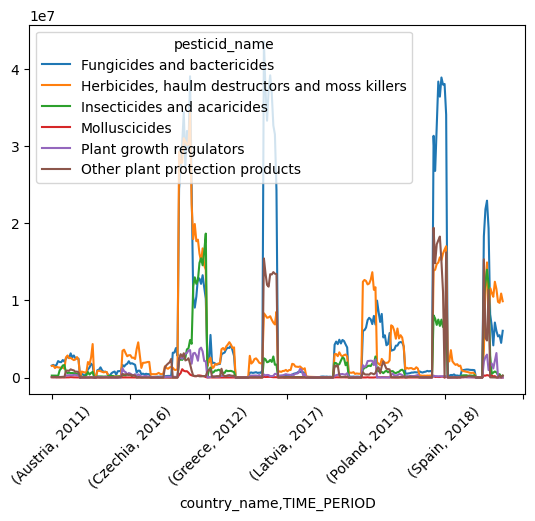

In [23]:
p_df.plot()
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.show()

## Forecasting


### Hypothesis creation


Before making a forecast, you should first determine the target (output) field for which the forecast will be built. The next step is to create a hypothesis that involves determining the input fields which our target depends on. Let's try to make a prediction about Fungicides and bactericides sales. We can propose the following hypothesis: sales depend on the sales of other pesticides.

To check this hypothesis, we should make a correlation analysis using **[pandas.DataFrame.corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01&highlight=corr#pandas-dataframe-corr)**.


In [24]:
pd.options.display.float_format = '{:,.2f}'.format
p_df.corr()

pesticid_name,Fungicides and bactericides,"Herbicides, haulm destructors and moss killers",Insecticides and acaricides,Molluscicides,Plant growth regulators,Other plant protection products
pesticid_name,,,,,,
Fungicides and bactericides,1.00,0.76,0.54,0.58,0.43,0.81
"Herbicides, haulm destructors and moss killers",0.76,1.00,0.60,0.79,0.81,0.37
Insecticides and acaricides,0.54,0.60,1.00,0.42,0.65,0.40
Molluscicides,0.58,0.79,0.42,1.00,0.69,0.23
Plant growth regulators,0.43,0.81,0.65,0.69,1.00,0.06
Other plant protection products,0.81,0.37,0.40,0.23,0.06,1.00


Each cell contains the correlation coefficients between two columns. Therefore, diagonal elements are equal to one. As can be seen from the Fungicides and bactericides column (or row), all the correlation coefficients are between 0.43 and 0.81. It means that there are nonlinear dependencies. To begin with, we will test linear models, which accuracy will be compared with the accuracy of nonlinear models. 


### Splitting the DataSet into training and test sets


For the model fitting and testing, it is necessary to divide the DataSet into a training and a test set. You can implement this with the classic Python tools such as slices or using a special function with many flexible settings (**[sklearn.model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)**).
We will take 30% of our DataSet for a test set.


In [25]:
proportion_train_test = 0.7
l = int(proportion_train_test * len(p_df))
col = p_df.columns

In [26]:
# Slises:
X_train, X_test, y_train, y_test = p_df[col[1:]][:l], p_df[col[1:]][l:], p_df[col[0]][:l], p_df[col[0]][l:]

<details><summary>Click <b>here</b> for the solution</summary> 
X_train, X_test, y_train, y_test = p_df[col[1:]][:l], p_df[col[1:]][l:], p_df[col[0]][:l], p_df[col[0]][l:]
</details>


In [27]:
# sklearn function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(p_df[col[1:]], p_df[col[0]], test_size=0.3, shuffle=False)

As a result, we got training and test DataSets.


In [28]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (201, 5)
X_test (87, 5)
y_train (201,)
y_test (87,)


### Creating a linear model using sklearn


To build a linear model, it is necessary to create the linear model itself, fit it, test it, and make a prediction.
To do this, use **[sklearn.linear_model.LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)**.


In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

<details><summary>Click <b>here</b> for the solution</summary> <code>
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
</code></details>


### Calculation of basic statistical indicators


The prediction results for the training and test sets are in **y_pred_test** and **y_pred_train** variables. After that, we can check the adequacy and accurancy of our model using **[sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)**. Also we can get the parameters of the linear model.


In [30]:
from sklearn import metrics
print("Correlation train", regressor.score(X_train, y_train))
print("Correlation test", regressor.score(X_test, y_test))
print("Coefficients:", regressor.coef_)
# pair the feature names with the coefficients
print('Pair the feature names with the coefficients:')
for s in zip(col[1:], regressor.coef_):
    print(s[0], ":", s[1])
print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, y_pred_train))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Correlation train 0.9625862760904372
Correlation test 0.6888681049525144
Coefficients: [ 0.79232453  0.14383752  7.98578085 -1.58666929  2.12375616]
Pair the feature names with the coefficients:
Herbicides, haulm destructors and moss killers : 0.7923245331894007
Insecticides and acaricides : 0.14383751668946268
Molluscicides : 7.985780854705393
Plant growth regulators : -1.5866692946920815
Other plant protection products : 2.1237561641699867
Mean Absolute Error (train): 1032241.3884064513
Mean Absolute Error (test): 2720115.102033193
Mean Squared Error (train): 3225638565885.0356
Mean Squared Error (test): 34849571028214.46
Root Mean Squared Error (train): 1796006.2822509937
Root Mean Squared Error (test): 5903352.524474077


<details><summary>Click <b>here</b> for the solution</summary> <code>
print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, y_pred_train))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
</code></details>


### Creating models using statsmodels


As you can see, there is a big difference in accuracy between the training and test results. It means that this linear model is not correct. 
Besides, this framework cannot generate a summary report.
To do this, we can use the **[statsmodels.api](https://www.statsmodels.org/stable/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)** framework.


In [31]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
y_pred_test_OLS = results.predict(X_test)
y_pred_train_OLS = results.predict(X_train)
print(results.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Fungicides and bactericides   R-squared (uncentered):                   0.970
Model:                                     OLS   Adj. R-squared (uncentered):              0.969
Method:                          Least Squares   F-statistic:                              1248.
Date:                         Fri, 20 Oct 2023   Prob (F-statistic):                   1.74e-146
Time:                                 16:25:23   Log-Likelihood:                         -3180.6
No. Observations:                          201   AIC:                                      6371.
Df Residuals:                              196   BIC:                                      6388.
Df Model:                                    5                                                  
Covariance Type:                     nonrobust                                                  
                              

As you can see, this framework uses the same principles for creating and fitting models. It allows us to build a summary report, also you can get all the other stats coefficients in the same way:


In [32]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params, sep = '\n')

coefficient of determination: 0.9695510214809883
adjusted coefficient of determination: 0.968774261824891
regression coefficients:
Herbicides, haulm destructors and moss killers    0.77
Insecticides and acaricides                       0.15
Molluscicides                                     8.67
Plant growth regulators                          -1.64
Other plant protection products                   2.12
dtype: float64


We should join the results to compare these two framework models using **[pandas.DataFrame.join()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)**:


In [33]:
df_test = pd.DataFrame({'Actual_test': y_test, 'Predicted_test': y_pred_test, 'Predicted_test_OLS': y_pred_test_OLS})
df_train = pd.DataFrame({'Actual_train': y_train, 'Predicted_train': y_pred_train, 'Predicted_train_OLS': y_pred_train_OLS})
df_res = df_train.join(df_test, how='outer')
df_res

Actual_train  Predicted_train  \
country_name   TIME_PERIOD                                  
Austria        2011         1,544,218.00     1,335,677.58   
               2012         1,634,371.00     1,243,499.21   
               2013         1,492,799.00     1,024,288.82   
               2014         1,641,055.00     1,078,618.07   
               2015         2,130,973.00     1,036,544.55   
...                                  ...              ...   
United Kingdom 2015                  NaN              NaN   
               2016                  NaN              NaN   
               2017                  NaN              NaN   
               2018                  NaN              NaN   
               2019                  NaN              NaN   

                            Predicted_train_OLS  Actual_test  Predicted_test  \
country_name   TIME_PERIOD                                                     
Austria        2011                1,516,917.57          NaN             NaN   
               2012                1,416,984.06          NaN             NaN   
               2013                1,197,669.29          NaN             NaN   
               2014                1,250,880.79          NaN             NaN   
               2015                1,212,244.93          NaN             NaN   
...                                         ...          ...             ...   
United Kingdom 2015                         NaN 6,032,359.00    3,957,038.46   
               2016                         NaN 5,330,003.00    7,634,222.77   
               2017                         NaN 5,484,053.00    8,119,198.28   
               2018                         NaN 4,492,460.00    8,460,127.02   
               2019                         NaN 6,056,984.00    8,221,924.85   

                            Predicted_test_OLS  
country_name   TIME_PERIOD                      
Austria        2011                        NaN  
               2012                        NaN  
               2013                        NaN  
               2014                        NaN  
               2015                        NaN  
...                                        ...  
United Kingdom 2015               3,768,210.15  
               2016               7,637,855.95  
               2017               8,123,750.43  
               2018               8,441,275.87  
               2019               8,220,913.23  

[288 rows x 6 columns]

As you can see, pandas joins and orders data correctly according to the index field automatically. Therefore, it is very important to check the index field datatype, especialy when we deal with datatime. 


Let's visualize the data.


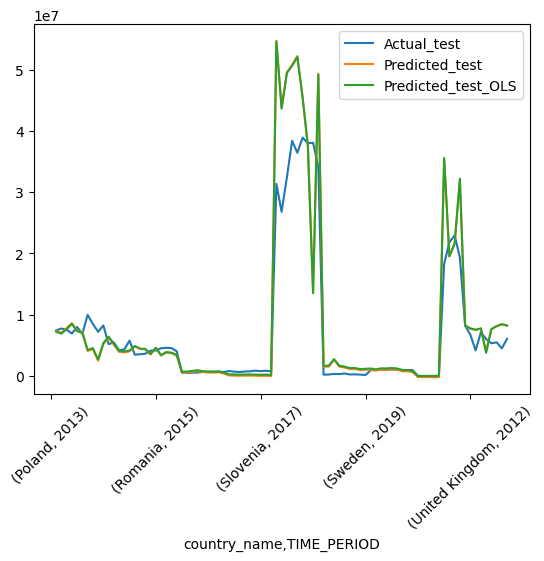

In [34]:
df_res[['Actual_test', 'Predicted_test', 'Predicted_test_OLS']].plot()
plt.xticks(rotation=45)
plt.show()

You can see that the results of these two models are the same. Also you can see that the forecast on the test data is not perfect. To see the difference between our forecast and the real data, we can use **[seaborn.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)**.


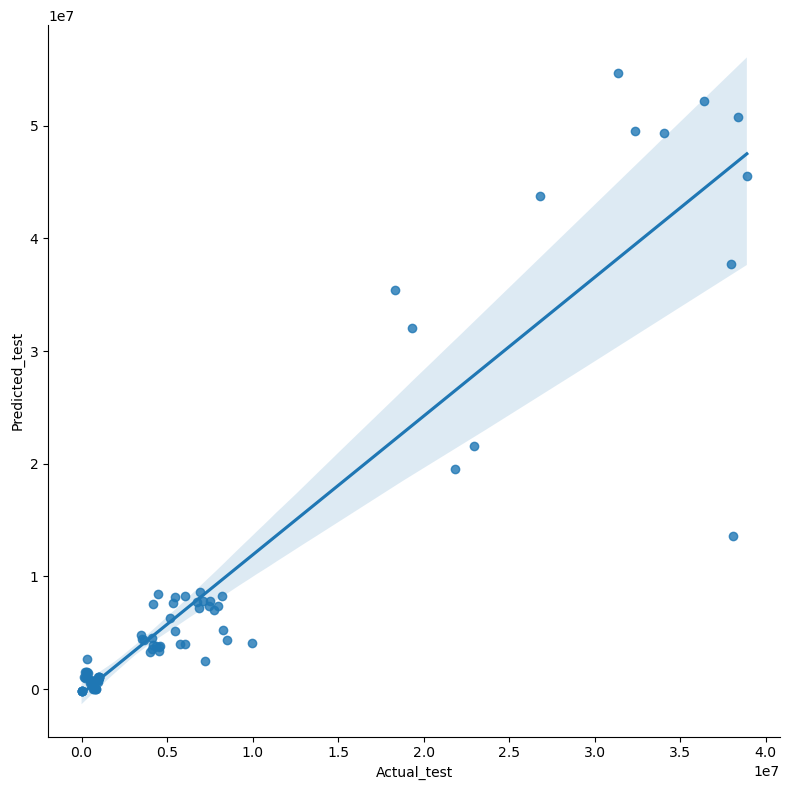

In [35]:
import seaborn as sns
sns.pairplot(df_test, x_vars=['Actual_test'], y_vars='Predicted_test',  kind='reg', height = 8)
plt.show()

The real data values are plotted on the horizontal axis and the predicted ones are plotted on the vertical axis. The closer the result points are to the diagonal, the better the model forecast is. This plot proves our conclusion about the bad forecast quality under this hypothesis. Moreover, in order to make a forecast for the future, you have to know future data for the sales of other pesticides. 


## Artificial Neural Network


### Creating a linear model using sklearn


Since the dependence turned out to be nonlinear, we will try to build a nonlinear model based on neural networks. The most popular libraries that allow you to build neural networks include **[scikit-learn](https://scikit-learn.org/stable/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)** and **[keras](https://keras.io/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)**.

The advantage of these frameworks is that the construction, training and forecasting principles are identical to the linear model. Only the model creation is different. That is an example of polymorphism of OOP.


Let's create multilayer percepton that consist of 100 neurons in hidden layer, fit it and test.


In [36]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(random_state=1, max_iter=500)
regressor.fit(X_train, y_train)
y_pred_test_MLP = regressor.predict(X_test)
y_pred_train_MLP = regressor.predict(X_train)

Let's calculate the same statistics as in Linear Regression.


In [37]:
print("Correlation train", regressor.score(X_train, y_train))
print("Correlation test", regressor.score(X_test, y_test))
print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, y_pred_train_MLP))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, y_pred_test_MLP))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, y_pred_train_MLP))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, y_pred_test_MLP))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_MLP)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_MLP)))

Correlation train 0.9393334154260803
Correlation test 0.8207034283210148
Mean Absolute Error (train): 1258755.0940049984
Mean Absolute Error (test): 2394402.2775823246
Mean Squared Error (train): 5230392872283.544
Mean Squared Error (test): 20082828888013.86
Root Mean Squared Error (train): 2287005.2191203116
Root Mean Squared Error (test): 4481386.937992954


<details><summary>Click <b>here</b> for the solution</summary> <code>
print("Correlation train", regressor.score(X_train, y_train))
print("Correlation test", regressor.score(X_test, y_test))

print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, y_pred_train_MLP))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, y_pred_test_MLP))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, y_pred_train_MLP))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, y_pred_test_MLP))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_MLP)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_MLP)))
</code></details>


As you can see, there are much less errors for test than for Linear regression.


### Creating a linear model using keras


Let's try to use a more powerful framework **keras**.


First of all, we should normalize all the data. To do this, the [**sklearn.preprocessing.MinMaxScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01) module should be used. 
It alows us to normalize [**fit_transform()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01#sklearn.preprocessing.MinMaxScaler.fit_transform) and convert back all the data easily: [**inverse_transform()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01#sklearn.preprocessing.MinMaxScaler.inverse_transform).


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler_x_train = MinMaxScaler(feature_range=(0, 1))
scaler_y_train = MinMaxScaler(feature_range=(0, 1))
scaler_x_test = MinMaxScaler(feature_range=(0, 1))
scaler_y_test = MinMaxScaler(feature_range=(0, 1))

# Normilized data
scaled_x_train = scaler_x_train.fit_transform(X_train.astype('float64')) 
scaled_y_train = scaler_y_train.fit_transform(y_train.astype('float64').values.reshape(-1, 1))
scaled_x_test = scaler_x_test.fit_transform(X_test.astype('float64'))
scaled_y_test = scaler_y_test.fit_transform(y_test.astype('float64').values.reshape(-1, 1))

A classical neural network is a [**multilayer neural network with back propagation**](https://en.wikipedia.org/wiki/Backpropagation?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01).

We will use [**keras**](https://keras.io/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01) framework.
First of all, we should create a Neural Network model as separate function.

A neural network is a sequence of layers. The function [**Sequential()**](https://keras.io/guides/sequential_model/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01) is used to create a network.

Let's create a network that consists of 2 hidden layers each of which consists of 100 neurons. [**keras.layers.Dense()**](https://keras.io/api/layers/core_layers/dense/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01).

To avoid retraining problems, we will use additional layers [**keras.layers.Dropout()**](https://keras.io/api/layers/regularization_layers/dropout/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01).

The output layer will consist of one neuron since we have only one value at the output.

The model should be compiled for fitting and predicting: [**keras.Model.compile()**](https://keras.io/api/models/model_training_apis/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01)


In [39]:
def BP_model(X):
    # create model
    model = Sequential()
    #model.add(BatchNormalization(input_shape=tuple([X.shape[1]])))
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Once the model function is built, it is necessary to create a neural network directly and specify the learning parameters: [**keras.wrappers.scikit_learn.KerasRegressor()**](https://keras.io/zh/scikit-learn-api/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01). Also we should specify the number of fitting [**epoch and batch size**](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01).


In [40]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
epochs = 10

batch_size=int(y_train.shape[0]*.1)

estimator = KerasRegressor(build_fn=BP_model, X=scaled_x_train, epochs=epochs, batch_size=batch_size, verbose=0)

Now, let’s train our model for **10** epochs.
It should be noted, that the fitting process is very slow. Therefore we saved our fitted model to a file.
To save time, we will upload the fitted model.
If you like, you can leave the parameter **fitting on True** to refit your model.
If you like, you can leave the parameter **fitting_save on True** to resave your model.


In [41]:
fitting = True
fitting_save = True


import pickle

if fitting:
    history=estimator.fit(scaled_x_train, scaled_y_train, validation_data=(scaled_x_test, scaled_y_test))
    if fitting_save:
        estimator.model.save('BP_saved_model.h5')
        print("Saved model to disk")
        with open('history.pickle', 'wb') as f:
            pickle.dump(history.history, f)
# load model 
from keras.models import load_model

# Instantiate the model as you please (we are not going to use this)
estimator = KerasRegressor(build_fn=BP_model, X=scaled_x_train, epochs=epochs, batch_size=batch_size, verbose=0)
# This is where you load the actual saved model into a new variable.
estimator.model = load_model('BP_saved_model.h5')    
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


Let's show [**loss and validation loss dynamics**](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01).


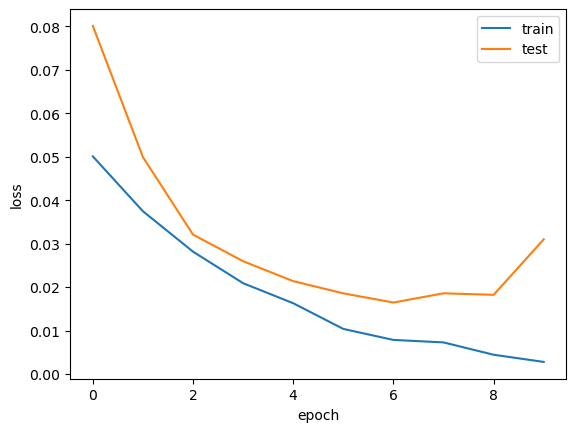

In [42]:
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

As you can see, the Neural Network is fitted well and no overfitting is observed.
Let's calculate the prediction of the training (**res_train_ANN**) and test (**res_test_ANN**) sets.


Let's make a prediction and inverse normalize data.


In [43]:
res_tr=estimator.predict(scaled_x_train)
res_ts=estimator.predict(scaled_x_test)
res_train_ANN=scaler_y_train.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN=scaler_y_test.inverse_transform(res_ts.reshape(-1, 1)).flatten()

Let's calculate the same statistics as in Linear Regression.


In [45]:
print("Correlation train", regressor.score(X_train,res_train_ANN ))
print("Correlation test", regressor.score(X_test,res_test_ANN))

print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, res_train_ANN))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error (train):', metrics.mean_squared_error( y_train, res_train_ANN))
print('Mean Squared Error (test):', metrics.mean_squared_error( y_test, res_test_ANN))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error( y_train, res_train_ANN)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error( y_test, res_test_ANN)))

Correlation train 0.9444700832501548
Correlation test 0.8845255429622162
Mean Absolute Error (train): 1565039.2661691543
Mean Absolute Error (test): 4417079.477729885
Mean Squared Error (train): 5079875631239.969
Mean Squared Error (test): 46888172804567.83
Root Mean Squared Error (train): 2253857.9438908673
Root Mean Squared Error (test): 6847493.906866061


<details><summary>Click <b>here</b> for the solution</summary> <code>
print("Correlation train", regressor.score(X_train, res_train_ANN))
print("Correlation test", regressor.score(X_test, res_test_ANN))

print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, res_train_ANN))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, res_train_ANN))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, res_train_ANN)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))
</code></details>


As you can see, the correlation is better than for the previous NN but the error is worse. Let's visualize the data for comparison.


In [46]:
df_test = pd.DataFrame({'Actual_test': y_test, 'Predicted_test': y_pred_test, 'Predicted_test_MLP': y_pred_test_MLP, 'Predicted_test_ANN': res_test_ANN})
df_train = pd.DataFrame({'Actual_train': y_train, 'Predicted_train': y_pred_train, 'Predicted_train_MLP': y_pred_train_MLP, 'Predicted_train_ANN': res_train_ANN})
df_res = df_train.join(df_test, how='outer')
df_res

Actual_train  Predicted_train  \
country_name   TIME_PERIOD                                  
Austria        2011         1,544,218.00     1,335,677.58   
               2012         1,634,371.00     1,243,499.21   
               2013         1,492,799.00     1,024,288.82   
               2014         1,641,055.00     1,078,618.07   
               2015         2,130,973.00     1,036,544.55   
...                                  ...              ...   
United Kingdom 2015                  NaN              NaN   
               2016                  NaN              NaN   
               2017                  NaN              NaN   
               2018                  NaN              NaN   
               2019                  NaN              NaN   

                            Predicted_train_MLP  Predicted_train_ANN  \
country_name   TIME_PERIOD                                             
Austria        2011                1,251,639.94         1,710,377.12   
               2012                1,252,847.19         1,637,889.12   
               2013                1,047,400.87         1,483,094.38   
               2014                1,118,236.12         1,518,814.12   
               2015                1,081,871.10         1,535,552.25   
...                                         ...                  ...   
United Kingdom 2015                         NaN                  NaN   
               2016                         NaN                  NaN   
               2017                         NaN                  NaN   
               2018                         NaN                  NaN   
               2019                         NaN                  NaN   

                            Actual_test  Predicted_test  Predicted_test_MLP  \
country_name   TIME_PERIOD                                                    
Austria        2011                 NaN             NaN                 NaN   
               2012                 NaN             NaN                 NaN   
               2013                 NaN             NaN                 NaN   
               2014                 NaN             NaN                 NaN   
               2015                 NaN             NaN                 NaN   
...                                 ...             ...                 ...   
United Kingdom 2015        6,032,359.00    3,957,038.46        8,834,191.90   
               2016        5,330,003.00    7,634,222.77        7,640,446.07   
               2017        5,484,053.00    8,119,198.28        7,924,548.08   
               2018        4,492,460.00    8,460,127.02        8,522,905.02   
               2019        6,056,984.00    8,221,924.85        8,098,218.08   

                            Predicted_test_ANN  
country_name   TIME_PERIOD                      
Austria        2011                        NaN  
               2012                        NaN  
               2013                        NaN  
               2014                        NaN  
               2015                        NaN  
...                                        ...  
United Kingdom 2015              16,717,640.00  
               2016               9,835,623.00  
               2017              10,101,430.00  
               2018              10,937,995.00  
               2019              10,285,028.00  

[288 rows x 8 columns]

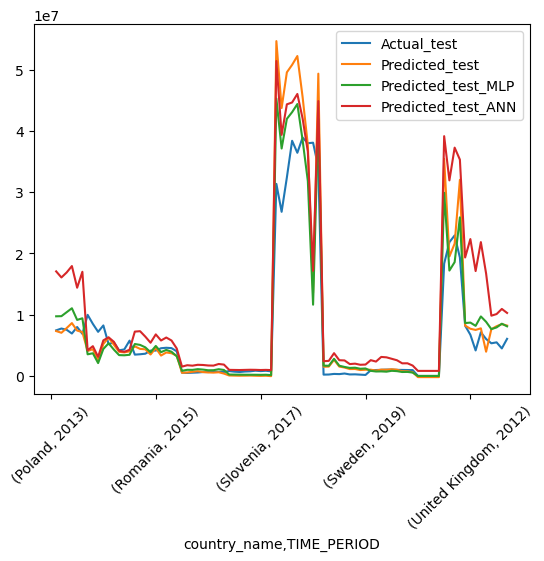

In [47]:
df_res[['Actual_test', 'Predicted_test', 'Predicted_test_MLP', 'Predicted_test_ANN', ]].plot()
plt.xticks(rotation=45)
plt.show()

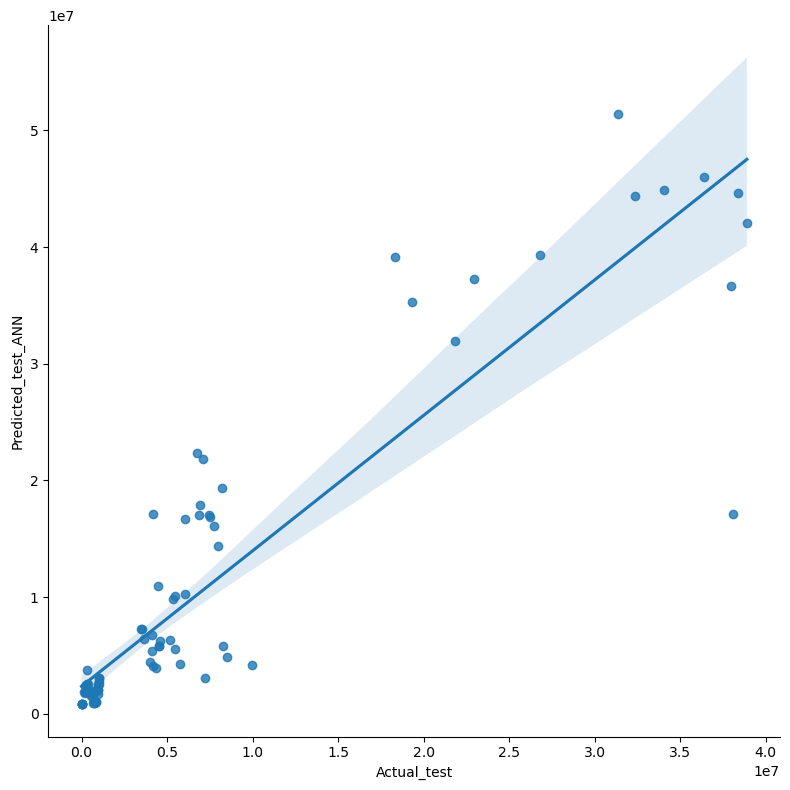

In [48]:
sns.pairplot(df_test, x_vars=['Actual_test'], y_vars='Predicted_test_ANN',  kind='reg', height = 8)
plt.show()

As you can see, an ANN shows better results.


## Conclusions


In this lab work, we have learned how to build hypotheses for forecasting models. We have transformed DataSets for input-output models. We have learned how to divide DataSets into training and test sets and normaliza data. The Linear regression and Neuro Network models have been created, fitted and tested in this lab.


## Authors


[Yaroslav Vyklyuk, prof., PhD., DrSc](https://author.skills.network/instructors/yaroslav_vyklyuk_2)


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagricultureprognosticationusingbyneuralnetwork466-2022-01-01).
